# Bussiness Understanding
Dalam kehidupan sehari-hari terutama di era modern seperti saat ini tentu kita sudah tidak asing dengan kata 'investasi'.
Investasi adalah suatu kegiatan menanamkan modal, baik langsung maupun tidak, dengan harapan pada waktu nanti pemilik modal mendapatkan sejumlah keuntungan dari hasil penanaman modal tersebut.(https://id.wikipedia.org/wiki/Investasi#:~:text=Investasi%20adalah%20suatu%20kegiatan%20menanamkan,dari%20hasil%20penanaman%20modal%20tersebut.)

Jadi pada dasarnya investasi merupakan membeli sesuatu yang diharapkan pada masa yang akan datang dapat dijual kembali dengan nilai yang lebih tinggi dari semula.
Jika pada zaman dahulu investasi banyak dikaitkan dengan barang maupun sumber daya yang berharga dan cenderung memiliki nilai yang akan bertambah. Barang tersebut cenderung memiliki nilai yang tidak fluktuatif/ tidak memiliki likuiditas yang tinggi.

Sebut saja seperti emas dan tanah. Namun di era modern yang dibarengi dengan kemajuan teknologi informasi, cara orang dalam mengartikan investasi bisa dibilang berbeda. Dimana di era modern sering dikaitkan dengan ekonomi dan keuangan. memang investasi sejak dahulu memiliki pengertian untuk menambah nilai suatu barang/property guna menambah harga dari barang atau property tersebut, namun jika di era sekarang orang cenderung mengartikan kata investasi dengan menambah kekayaan. Tentu ini dua hal yang berbeda.

Sifat dari manusia yang tidak pernah puas serta selalu ingin lebih dari yang lain mendorong seseorang untuk memperoleh keuntungan secara cepat dari investasi tersebut. hal ini menyebabkan banyak orang terjerumus kedalam keserakahannya sendiri. Maka tidak heran jika kahir-akhir inibanyak tindakan penipuan yang mengatasnamakan investasi

Proyek ini saya gunakan untuk mengetahui bagaimana tanggapan masyarakat indonesia tentang kata investasi, dan apa yang menjadi topik utama jika kita kaitkan dengan investasi. Tentu ini akan menjadi masukan yang bagus untuk proses bisnis di bidang consulting maupun di bidang produk lainnya yang berkaitan dengan keuangan.



In [171]:
# Import semua library yang akan digunakan
import json
import tweepy
import datetime
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import gensim
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models
from numpy import array
import tqdm
from pprint import pprint
import networkx as nx


# Data Collection
## Twitter data
dalam proyek ini saya menggunakan twitter API untukmendapatkan data dari tweet antara tanggal 4-8 April 2022, serta tambahan dari situs portal berita https://www.kompas.com/


In [172]:
# menghubungkan dengan token.json
with open("token.json") as f:
    tokens = json.load(f)

    bearer_token = tokens['bearer_token']
    api_key = tokens['api_key']
    api_key_secret = tokens['api_key_secret']
    access_token = tokens["access_token"]
    access_token_secret = tokens["access_token_secret"]


In [173]:
# # pada kesempatan kali ini saya akan menggunakan TWEEPY
# # yang saya gunakan adalah tweepy v1

# query = 'investasi -filter:retweets since:2022-04-04'
# # max_result = 10000

# def auth_handler():
#     auth = tweepy.OAuthHandler(api_key, api_key_secret)
#     auth.set_access_token(access_token, access_token_secret)
#     api = tweepy.API(auth, wait_on_rate_limit=True)
#     return api


# tweet_id = []
# if tweet_id == []:
#     response = tweepy.Cursor(auth_handler().search_tweets,
#                                     q=query,
#                                     lang='id',
#                                     # max_id=tweet_id[-1],
#                                     # since_id=tweet_id[0],
#                                     tweet_mode='extended'
#                                 ).items()
# else:
#     response = tweepy.Cursor(auth_handler().search_tweets,
#                                 q=query,
#                                 lang='id',
#                                 max_id=tweet_id[-1],
#                                 since_id=tweet_id[0],
#                                 tweet_mode='extended'
#                                 ).items()


    
# start_time = datetime.datetime(
#     2022, 4, 4, 0, 0, tzinfo=datetime.timezone.utc)


# data = []
# try:
#     # data = [tweet.full_text.strip()
#     #             for tweet in response if tweet.created_at >= start_time]
#     for tweet in response:
#         tweet_id.append(tweet.id)
#         if tweet.created_at >= start_time:
#             data.append(tweet.full_text.strip())
# except tweepy.TweepyException as e:
#     print("Going to sleep:", e)
#     time.sleep(60)

In [174]:

# df_tweets = pd.DataFrame(data, columns=["tweets"])
# df_tweets.to_csv("data_investasi_scrap.csv")



In [175]:
# menampilkan dataframe
df_tweet = pd.read_csv('data_investasi_scrap.csv')
df_tweet


,Unnamed: 0,tweets
0,0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF
1,1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...
2,2,Kini anda dpt mewujudkan semua yg pernah\nanda...
3,3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...
4,4,1.Mewaspadai Tawaran Investasi #InvestasiBodong
...,...,...
5473,5473,@aissyahamh Investasi tiada henti gosip ki wkwk
5474,5474,Terungkap! Inisial DDA dan WKA jadi tersangka ...
5475,5475,PPATK akan terus menelusuri transaksi-transaks...
5476,5476,. pacaran sampai 3/5 tahun tapi gagal nikah it...


## scrapping kompas
disini saya akan mengambil data dari website portal berita kompas dengan tag investasi (https://www.kompas.com/tag/)

Dengan teknik web scrapping saya akan mengambil query pada halaman home dengan query 'investasi'.

In [176]:
# # user agent

# user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36"
# headers = {
#     'User-Agent': user_agent
# }


# #kita buat variabel query untuk pencarian
# query = 'investasi'
# pages = 364

# # url untuk pencarian kata kunci(query)
# # karena terdapat 364 halaman maka saya akan melakukan looping untuk mengambil semua halaman
# list_title=[]
# for page in range(364):
#     url = f"https://www.kompas.com/tag/{query}?sort=desc&page={page}"


#     #request- response
#     data_request = Request(url, headers=headers)

#     # object beautifulsoup html
#     response = urlopen(data_request)
#     data = bs(response, "html.parser")

#     # object beautifulsoup container berita
#     container = data.find("div", {"class": "latest--topic mt2 clearfix"})

#     # object article berita
#     articles = container.find_all("h3", {"class": "article__title"})
#     for title in articles:
#         list_title.append(title.get_text().rstrip())
#     # list_title = [title.get_text().rstrip() for title in articles]
#     # print(list_title)


# df_news = pd.DataFrame(list_title, columns=["news"])
# df_news.to_csv("data_investasi_kompas.csv")


In [177]:
df_news = pd.read_csv('data_investasi_kompas.csv')
df_news

,Unnamed: 0,news
0,0,Penggugat Tolak Dana Kerahiman dari Yusuf Mans...
1,1,"Mediasi Kasus Wanprestasi, Yusuf Mansur Dimint..."
2,2,Ini Alasan Penggugat Yusuf Mansur Batal Minta ...
3,3,"Mediasi Kasus Wanprestasi Yusuf Mansur, Tuntut..."
4,4,"Polisi Tangkap Bandar Arisan Bodong di Kalsel,..."
...,...,...
5455,5455,"Modus Investasi, Pria Ini Tipu Warga Ratusan J..."
5456,5456,Pengusaha 3 Negara Berminat Investasi di Sulaw...
5457,5457,Jero Wacik Janji Sederhanakan Perizinan Invest...
5458,5458,Bagaimana Gambaran Hoki Anda di Bulan Juli?


# Preprocessing
## preprocessing dataframe
pada langkah ini kita akan melakukan pembersihan pada kedua dataframe antarai lain :
- cek nilai null
- cek duplicate data
- melakukan penggabungan kedua data frame 

### Cek Nilai Null

In [178]:
# cek nilai null df_tweet
df_tweet.isnull().sum()

Unnamed: 0    0
tweets        0
dtype: int64

In [179]:
# cek nilai null df_news
df_tweet.isnull().sum()


Unnamed: 0    0
tweets        0
dtype: int64

### menggabungkan kedua dataframe


In [180]:
data = []

for text in df_tweet['tweets']:
    data.append(text)
print(len(data))


for text in df_news['news']:
    data.append(text)
print(len(data))


dataframe_all = pd.DataFrame(data, columns=['text'])
dataframe_all.to_csv('data_proyek_final.csv')


5478
10938


In [181]:
dataframe_all


,text
0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF
1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...
2,Kini anda dpt mewujudkan semua yg pernah\nanda...
3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...
4,1.Mewaspadai Tawaran Investasi #InvestasiBodong
...,...
10933,"Modus Investasi, Pria Ini Tipu Warga Ratusan J..."
10934,Pengusaha 3 Negara Berminat Investasi di Sulaw...
10935,Jero Wacik Janji Sederhanakan Perizinan Invest...
10936,Bagaimana Gambaran Hoki Anda di Bulan Juli?


Dari data diatas kita tidak menemukan nilai null pada data

### Cek duplicate data
kita akan menggunakan list index untuk cek kesamaan pada text

kenapa tidak pakai pandas? 

karena kita akan memeriksa kesamaan seluruh text, sehingga nanti hanya text yang semau sama akan kita hapus.
Jika menggunakan pandas saya mendapati bahwa pandas akan memeriksa  adanya kesamaan text, bukan kesamaan keseluruhan text.

In [182]:
# cek duplicate data
#
total = 0
data_list = [data for data in dataframe_all['text']]
for i in range(len(data_list)):
    # print(data)
    if i > 0:
        if data_list[i] == data_list[i-1]:
            print(i)
            print(i-1)
            total = total+1
            print(data_list[i])
            print(data_list[i-1])

print(total)

3162
3161
@SyeikhAliong Hal ini merupakan kesempatan Indonesia untuk terus menarik peluang investasi, terutama dalam proyek pembangunan  #Jokowi #InfrastrukturRImaju
@SyeikhAliong Hal ini merupakan kesempatan Indonesia untuk terus menarik peluang investasi, terutama dalam proyek pembangunan  #Jokowi #InfrastrukturRImaju
5183
5182
@tokopedia Spesial Ramadan untukmu! A Muzzamil kasih kamu THR cashback belanja, produk digital, investasi, dan belanja pakai GoPay hingga 5,3 Juta   Bonus hingga 1 Juta! Kumpulkan 8 stamp dan KLIK LINKNYA sekarang! https://t.co/LfQLy8YFAG…
@tokopedia Spesial Ramadan untukmu! A Muzzamil kasih kamu THR cashback belanja, produk digital, investasi, dan belanja pakai GoPay hingga 5,3 Juta   Bonus hingga 1 Juta! Kumpulkan 8 stamp dan KLIK LINKNYA sekarang! https://t.co/LfQLy8YFAG…
9020
9019
Karena Skincare adalah Investasi...
Karena Skincare adalah Investasi...
3


Dari data diatas terdapat duplicate sebagai berikut:
baris pada df_tweet :
- 3161
- 3162

- 5182
- 5183


- 3541
- 3542

In [183]:
# menghapus data dengan fungsi drop
dataframe_all = dataframe_all.drop([3162, 5183, 3542])
dataframe_all


,text
0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF
1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...
2,Kini anda dpt mewujudkan semua yg pernah\nanda...
3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...
4,1.Mewaspadai Tawaran Investasi #InvestasiBodong
...,...
10933,"Modus Investasi, Pria Ini Tipu Warga Ratusan J..."
10934,Pengusaha 3 Negara Berminat Investasi di Sulaw...
10935,Jero Wacik Janji Sederhanakan Perizinan Invest...
10936,Bagaimana Gambaran Hoki Anda di Bulan Juli?


### Text Processing
Pada langkah ini saya akan melakukan text processing diantaranya:
- case folding
- word token
- slang remove
- remove stopwords 

In [184]:
def case_folding(data):
    data = [item.lower() for item in data]
    data = [' '.join(
        re.sub("(@[A-Za-z0-9-_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(rt )|(&[A-Za-z] ) | (#[A-Za-z]+)", " ", item).split()) for item in data]
    data = [re.sub(r"\d+", "", item) for item in data]
    data = [item.translate(str.maketrans("", "", string.punctuation))
            for item in data]
    data = [re.sub(r"\n", "", item) for item in data]
    data = [re.sub(r"\t", "", item) for item in data]
    data = [item.rstrip().lstrip() for item in data]
    data = [item.replace("  ", " ") for item in data]
    return data


def word_tokens(data):
    tokenized_sents = [word_tokenize(i) for i in data]
    return tokenized_sents


def slang_replace(data):

    # Loading Slang dan Singkatan dari File slang.txt
    # cetak 5 data slang
    df = open('data/slang.txt', "r", encoding="utf-8", errors='replace')
    slang = df.readlines()
    df.close()
    slang = [t.strip('\n').strip() for t in slang]
    # pisahkan berdasarkan ':'
    slang = [t.split(":") for t in slang]
    slang = [[k.strip(), v.strip()] for k, v in slang]
    slang = {k: v for k, v in slang}

    result = []
    for sentence_token in data:
        for i, t in enumerate(sentence_token):
            if t in slang.keys():
                sentence_token[i] = slang[t]
            text = ' '.join(sentence_token)
        result.append(text)
    return result


def remove_stopwords(data):
    data_list = word_tokens(data)
    stop_words = stopwords.words('indonesian')

    result = []
    for sentence in data_list:
        filtered_sentence = []
        for word in sentence:
            if word not in stop_words:
                filtered_sentence.append(word)
            text = ' '.join(filtered_sentence)
        result.append(text)

    return result

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16544\2749427151.py:4: DeprecationWarning: invalid escape sequence \w
  re.sub("(@[A-Za-z0-9-_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(rt )|(&[A-Za-z] ) | (#[A-Za-z]+)", " ", item).split()) for item in data]


In [185]:
# membersihkan data berdasarkan fungsi yang sudah dibuat
df = dataframe_all.copy()
result = case_folding(dataframe_all['text'])
result = word_tokens(result)
result = slang_replace(result)
result = remove_stopwords(result)
df["text_clean"] = result
df


,text,text_clean
0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF,harga emas
1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...,bumn jalankan misi investasi papua nugini sesu...
2,Kini anda dpt mewujudkan semua yg pernah\nanda...,mewujudkan impikan pendidikan renovasi rumah p...
3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...,menabung mempertahankan kekayaan investasi men...
4,1.Mewaspadai Tawaran Investasi #InvestasiBodong,mewaspadai tawaran investasi
...,...,...
10933,"Modus Investasi, Pria Ini Tipu Warga Ratusan J...",modus investasi pria tipu warga ratusan juta r...
10934,Pengusaha 3 Negara Berminat Investasi di Sulaw...,pengusaha negara berminat investasi sulawesi
10935,Jero Wacik Janji Sederhanakan Perizinan Invest...,jero wacik janji sederhanakan perizinan invest...
10936,Bagaimana Gambaran Hoki Anda di Bulan Juli?,gambaran hoki juli


## Data Processing
Disini saya akan melakukan beberapa macam pengolahan text untuk mencari insight, antara lain:
- text analysis
- topic modelling
- sentiment analysis

### Text Analysis

distribusi :          text_clean
count  10935.000000
mean      73.825972
std       46.816856
min        0.000000
25%       43.000000
50%       57.000000
75%       93.000000
max      260.000000
Skew : text_clean    1.185992
dtype: float64


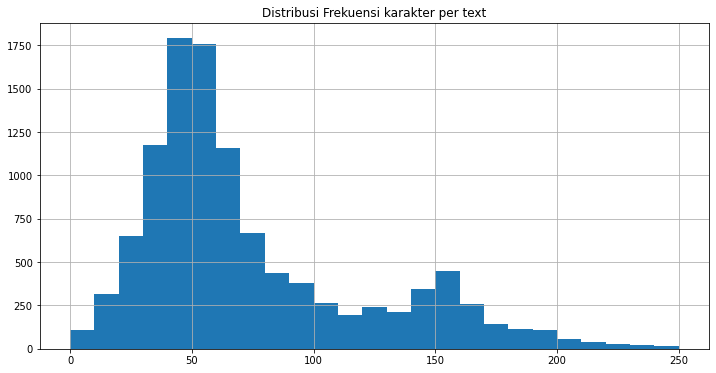

In [186]:
# untuk mengetahui deskriptif analytics pada data
def descriptive_analysis(series):
    df = pd.DataFrame(series)
    print(f"distribusi : {df.describe()}")
    print(f"Skew : {df.skew()}")




# Distribusi Frekuensi karakter per tweet

plt.figure(figsize=(12, 6))
bin_range = np.arange(0, 260, 10)
char_freq = df['text_clean'].str.len()
char_freq.hist(bins=bin_range)
descriptive_analysis(char_freq)
plt.title('Distribusi Frekuensi karakter per text')
plt.show()


Distribusi karakter per text cenderung skew ke kiri dengan rata-rata 73.82 dan median 57.

distribusi :          text_clean
count  10935.000000
mean       9.856607
std        6.154118
min        0.000000
25%        6.000000
50%        8.000000
75%       12.000000
max       39.000000
Skew : text_clean    1.203963
dtype: float64


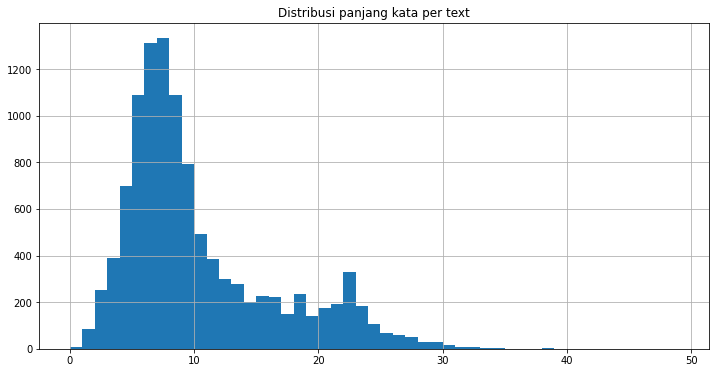

In [187]:
# Distribusi panjang kata per tweet
plt.figure(figsize=(12, 6))
bin_range = np.arange(0, 50)
char_length = df['text_clean'].str.split().map(lambda x: len(x))
char_length.hist(bins=bin_range)
descriptive_analysis(char_length)
plt.title('Distribusi panjang kata per text')
plt.show()


Panjang kata per text juga cenderung skew ke kiri, ini ditunjukkan dari visualisasi dan nilai skew diangka 1.203

D:\PKS Digital School\pks_digital\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\PKS Digital School\pks_digital\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


distribusi :          text_clean
count  10927.000000
mean       6.646838
std        1.048892
min        2.000000
25%        6.000000
50%        6.565217
75%        7.256579
max       14.666667
Skew : text_clean    0.563996
dtype: float64


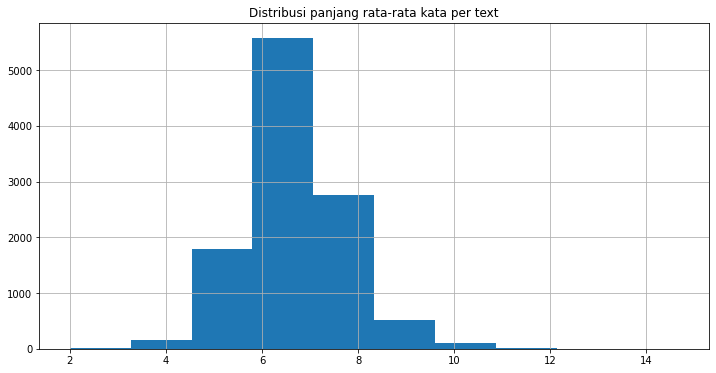

In [188]:
# Distribusi panjang rata-rata kata per tweet
plt.figure(figsize=(12, 6))
char_mean_length = df['text_clean'].str.split().apply(lambda x: [len(i)
                                                                         for i in x]).map(lambda x: np.mean(x))
char_mean_length.hist()
descriptive_analysis(char_mean_length)
plt.title('Distribusi panjang rata-rata kata per text')
plt.show()


Sedangkan untuk panjang rata-rata kata per text sedikit lebih terdistribusi normal dimana dimana antara mean dan median tidak jauh berbeda

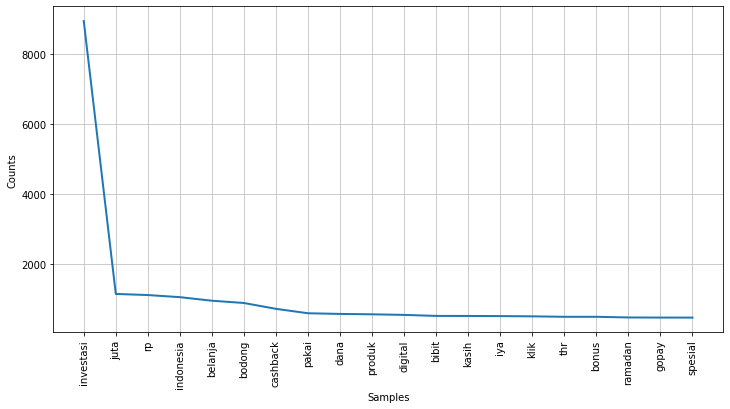

In [189]:
# Distribusi Kata
df['text_clean'] = df['text_clean'].apply(
    lambda x: word_tokenize(str(x)))
tweets = [word for tweet in df['text_clean']
          for word in tweet]  # flattening
fqdist = FreqDist(tweets)
most_common_word = fqdist.most_common(50)

# Visualisasi Distribusi kata
plt.figure(figsize=(12, 6))
fqdist.plot(20, cumulative=False)
plt.show('Visualisasi Distribusi kata')
plt.show()


Disini dapat kita lihat distribusi kata yang sering keluar, dimana kata investasi paling banyak, diikuti kata rp yang merefleksikan rupiah, dan diikuti oleh kata-kata lain

In [190]:
# Distribusi Bi gram
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(result)


(investasi, bodong)     824
(digital, investasi)    467
(investasi, belanja)    465
(pakai, gopay)          464
(belanja, pakai)        464
(belanja, produk)       463
(cashback, belanja)     463
(thr, cashback)         463
(produk, digital)       463
(klik, linknya)         462
(juta, bonus)           462
(gopay, juta)           462
(bonus, juta)           461
(spesial, ramadan)      460
(ramadan, untukmu)      460
(kumpulkan, stamp)      455
(stamp, klik)           455
(juta, kumpulkan)       454
(kasih, thr)            449
(rp, triliun)           436
dtype: int64


disini cukup menarik dimana kata investasi dan bodong menjadi kata kombinasi yang sering keluar, ini sesuai dengan topik yang sering diperbincangkan belakangan ini

### Sentiment Analysis
Selanjutnya saya akan melakukan sentiment analysis untuk mengetahui bagaimna respon masyarakat tentang investasi khususnya di Indonesia

In [191]:
# mengubah token menjadi string pada dataframe
data = df['text_clean'].copy()
result = []
for d in data:
    text = ' '.join(d)
    result.append(text)

df['text_clean'] = result
df


,text,text_clean
0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF,harga emas
1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...,bumn jalankan misi investasi papua nugini sesu...
2,Kini anda dpt mewujudkan semua yg pernah\nanda...,mewujudkan impikan pendidikan renovasi rumah p...
3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...,menabung mempertahankan kekayaan investasi men...
4,1.Mewaspadai Tawaran Investasi #InvestasiBodong,mewaspadai tawaran investasi
...,...,...
10933,"Modus Investasi, Pria Ini Tipu Warga Ratusan J...",modus investasi pria tipu warga ratusan juta r...
10934,Pengusaha 3 Negara Berminat Investasi di Sulaw...,pengusaha negara berminat investasi sulawesi
10935,Jero Wacik Janji Sederhanakan Perizinan Invest...,jero wacik janji sederhanakan perizinan invest...
10936,Bagaimana Gambaran Hoki Anda di Bulan Juli?,gambaran hoki juli


In [192]:
# menggunakan kata sentiment yang sudah disediakan(file terlampir)
with open("data/kata_positif.txt", "r") as positif_file:
  positive_words = list(set(positif_file.readlines()))
with open("data/kata_negatif.txt", "r") as negative_file:
  negative_words = list(set(negative_file.readlines()))


In [193]:
sentiment_word = []
good_text =[]
bad_text=[]

for tweet in df['text_clean']:

    word = tweet.strip().split()

    good_count = 0  # nilai positif
    bad_count = 0  # nilai negatif

    for good_word in positive_words:
        count = word.count(good_word.strip().lower())
        if count > 0:
          good_text.append(good_word.strip())
          good_count += count

    for bad_word in negative_words:
        count = word.count(bad_word.strip().lower())
        if count > 0:
          bad_text.append(bad_word.strip())
          bad_count += count


    sentiment_word.append(good_count - bad_count)




good_text = set(good_text)
bad_text = set(bad_text)

print(good_text)
print(bad_text)


{'tampan', 'inovatif', 'rukun', 'konkret', 'terpilih', 'didonasikan', 'penjelasan', 'mendorong', 'mengedukasi', 'konsisten', 'mengamankan', 'menginspirasi', 'rajin', 'kebaikan', 'didik', 'kerukunan', 'kaji', 'bismillah', 'menetapkan', 'ikhtiar', 'meraih', 'harmonisasi', 'hibah', 'fakta', 'sejalan', 'kokoh', 'menyayangi', 'beasiswa', 'akrab', 'arahan', 'efektif', 'bonus', 'semoga', 'suka', 'diarahkan', 'komplet', 'kuat', 'silaturahmi', 'sabar', 'terkendali', 'diperbaiki', 'doakan', 'berfungsi', 'inspirasi', 'mengisi', 'tercerdas', 'memajukan', 'sumbangan', 'sayang', 'positif', 'kewajiban', 'kebersamaan', 'berhemat', 'amal', 'diamini', 'nyaman', 'perkembangan', 'bekal', 'optimis', 'percaya', 'dibantu', 'kamil', 'harapan', 'laporkan', 'hadiah', 'asyik', 'final', 'diminati', 'menertibkan', 'sistematis', 'dilancarkan', 'beruntung', 'harapkan', 'menang', 'terbiasa', 'kerja', 'dipelajari', 'megah', 'lancar', 'lega', 'cinta', 'solid', 'kolaborasi', 'adil', 'lolos', 'relevan', 'sehat', 'senang'

In [194]:
# Analysis jumlah banyak sentiment positif , negatif dan netral dalam setiap text

sentiments = ["positif" if sentimen > 0 else (
    "netral" if sentimen == 0 else "negatif") for sentimen in sentiment_word]

df_raw = pd.DataFrame()
df_raw["sentiment"] = sentiments

df_raw.value_counts()


sentiment
netral       5162
positif      3346
negatif      2427
dtype: int64

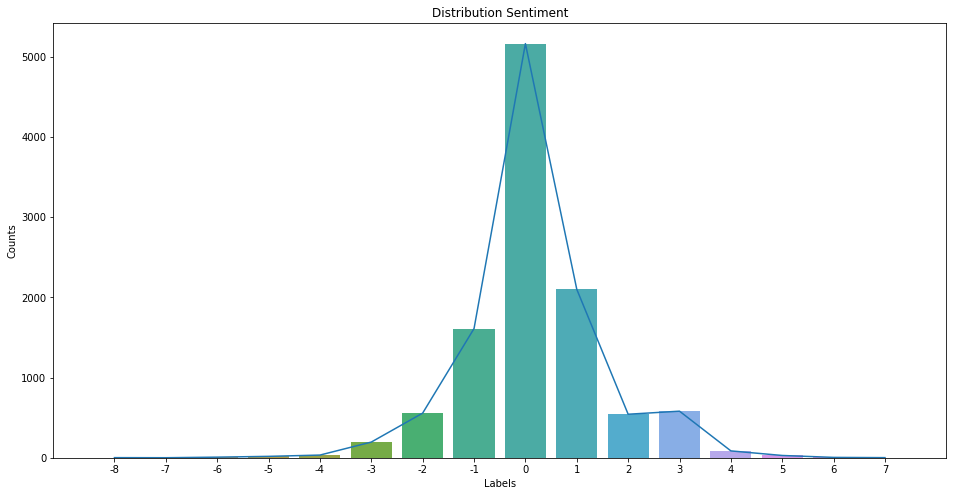

In [195]:
# Kita lakukan plot terhadap data
labels, counts = np.unique(sentiment_word, return_counts=True)


fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xticks(ax.get_xticks())

sns.barplot(x=list(labels),
            y=list(counts))

sns.lineplot(x=ax.get_xticks(),
             y=list(counts))

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')

plt.show()


D:\PKS Digital School\pks_digital\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


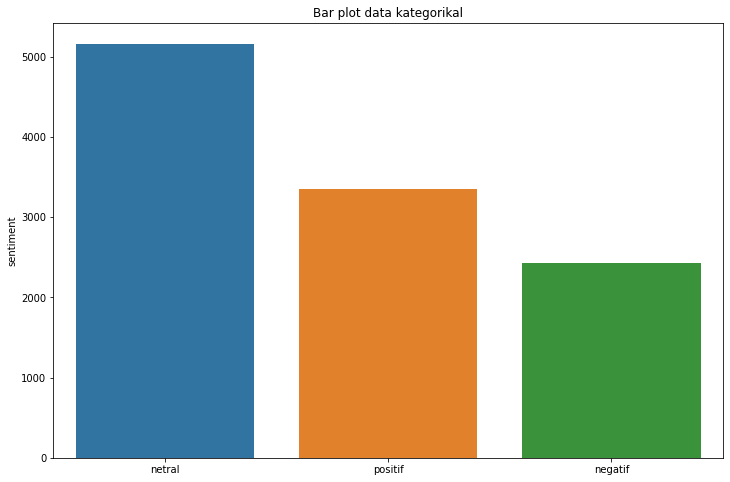

In [196]:
# lakukan plot secara kategorikal
data = df_raw.value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(df_raw['sentiment'].value_counts().index,
            df_raw['sentiment'].value_counts())
plt.title('Bar plot data kategorikal')
plt.show()


### Kesimpulan
Dari sentiment analysis diatas kita dapat menarik kesimpulan bahwa kecenderungan orang-orang dan berita memberikan sentiment yang netral, ini dibuktikan dari jumlah sentimen netral yang lebih banyak diikuti dengan sentiment positif lalu negatif.

Meskipun sekarang banyak kasus dimana mengatasnamakan investasi namun ini membuktikan bahwa rakyat Indonesia tetap memiliki pandangan yang positif terhadap investasi, yang perlu dilakukan adalah memperlajari investasi itu snediri dan tidak hanya ikut-ikutan dan bernafsu ingin cepat memperoleh keuntungan besar dari investasi

## Topic Modelling
selanjutnya kita akan melakukan topic modelling untuk mengetahui topic yang sedang hangat diperbincangkan

Saya akan menggunakan teknik LDA ( Latent Dirichlet Allocation ), dan library gensim.

Gensim di antaranya gensim.model dan gensim.corpora. Modul gensim.model digunakan untuk membangun model LDA dengan memanggil modul LdaModel. Selain itu juga akan dipanggil ketika melakukan proses penghitungan coherence model yang dilakukan dengan mengimpor modul CoherenceModel. Sedangkan modul gensim.corpora akan digunakan untuk membangun dictionary dari data teks sebelum dilakukan proses pembuatan model LDA. Pembuatan dictionary dilakukan dengan memanggil modul Dictionary.

In [223]:
list_text = [data.split() for data in df["text_clean"]]


dictionary = corpora.Dictionary(list_text)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in list_text]

# Lda = gensim.models.ldamodel.LdaModel
# ldamodel = Lda(
#     random_state=100,
#     chunksize=100,
#     per_word_topics=True,
#     corpus=doc_term_matrix,
#     num_topics=5,
#     id2word=dictionary,
#     passes=50
# )
# pprint(ldamodel.print_topics())


# # # MEncari Coherence value
# # coherence_model_lda = CoherenceModel(
# #     model=ldamodel, texts=list_text, dictionary=dictionary, coherence='c_v')
# # coherence_lda = coherence_model_lda.get_coherence()
# # print('\nCoherence Score: ', coherence_lda)


# function untuk mencari nilai k, a dan b terbaik
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=list_text, dictionary=dictionary, coherence='c_v')

    return coherence_model_lda.get_coherence()


# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [  # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25),
    # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5),
    gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75),
    doc_term_matrix]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                 }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()




100%|██████████| 540/540 [9:17:16<00:00, 61.92s/it]      


In [237]:
df_tuning_result = pd.read_csv('lda_tuning_results.csv')
df_tuning_result.sort_values(by='Coherence', ascending=False)


,Validation_Set,Topics,Alpha,Beta,Coherence
148,75% Corpus,6,asymmetric,0.9099999999999999,0.527759
206,75% Corpus,8,asymmetric,0.31,0.521718
418,100% Corpus,6,asymmetric,0.9099999999999999,0.513145
149,75% Corpus,6,asymmetric,symmetric,0.511986
476,100% Corpus,8,asymmetric,0.31,0.511494
...,...,...,...,...,...
2,75% Corpus,2,0.01,0.61,0.225417
294,100% Corpus,2,symmetric,symmetric,0.222612
6,75% Corpus,2,0.31,0.31,0.222447
3,75% Corpus,2,0.01,0.9099999999999999,0.221264


<AxesSubplot:xlabel='Topics'>

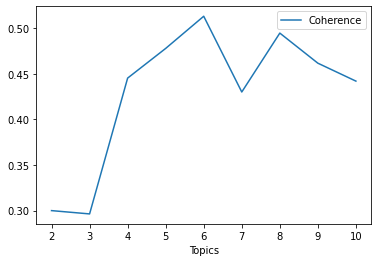

In [238]:
# plot untuk mencari nilai k terbaik
df_tuning_result = pd.read_csv('lda_tuning_results.csv')
df_plot = df_tuning_result[(df_tuning_result.Alpha == "asymmetric") & (
    df_tuning_result.Beta == "0.9099999999999999") & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y="Coherence", kind="line")


In [240]:
# cek nilai alhpa dan beta terbaik
df_plot_2 = df_tuning_result[(df_tuning_result.Topics == 6) & (
    df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)


,Validation_Set,Topics,Alpha,Beta,Coherence
418,100% Corpus,6,asymmetric,0.9099999999999999,0.513145
419,100% Corpus,6,asymmetric,symmetric,0.489602
416,100% Corpus,6,asymmetric,0.31,0.455044
414,100% Corpus,6,symmetric,symmetric,0.440017
417,100% Corpus,6,asymmetric,0.61,0.439371
395,100% Corpus,6,0.31,0.01,0.430030
410,100% Corpus,6,symmetric,0.01,0.425101
411,100% Corpus,6,symmetric,0.31,0.417002
394,100% Corpus,6,0.01,symmetric,0.411658
398,100% Corpus,6,0.31,0.9099999999999999,0.410934


In [241]:



lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                      id2word=dictionary,
                                      num_topics=6,
                                      random_state=100,
                                      chunksize=100,
                                      passes=10,
                                      alpha='asymmetric',
                                      eta=0.9)

pprint(lda_model.print_topics())


[(0,
  '0.080*"investasi" + 0.011*"bodong" + 0.009*"dana" + 0.008*"saham" + '
  '0.007*"emas" + 0.006*"properti" + 0.006*"reksa" + 0.005*"uang" + '
  '0.004*"ojk" + 0.004*"rumah"'),
 (1,
  '0.079*"investasi" + 0.021*"rp" + 0.020*"indonesia" + 0.013*"triliun" + '
  '0.009*"pemerintah" + 0.008*"jokowi" + 0.007*"miliar" + 0.006*"asing" + '
  '0.006*"investor" + 0.006*"amerika"'),
 (2,
  '0.034*"juta" + 0.023*"belanja" + 0.016*"produk" + 0.014*"digital" + '
  '0.013*"pakai" + 0.012*"investasi" + 0.012*"kasih" + 0.012*"klik" + '
  '0.012*"bonus" + 0.012*"thr"'),
 (3,
  '0.011*"bibit" + 0.009*"rp" + 0.009*"investasi" + 0.008*"reksadana" + '
  '0.006*"dapatkan" + 0.006*"kode" + 0.006*"referral" + 0.006*"cashback" + '
  '0.006*"memasukkan" + 0.005*"download"'),
 (4,
  '0.024*"tol" + 0.010*"jalan" + 0.005*"listrik" + 0.005*"trans" + '
  '0.004*"hotel" + 0.003*"semarang" + 0.003*"lahan" + 0.003*"arab" + '
  '0.003*"jembatan" + 0.003*"kendaraan"'),
 (5,
  '0.003*"ihsg" + 0.002*"menguat" + 0.002*"

In [242]:
# visualisasi dengan pyLDAvis

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)

# menyimpan hasil visualisasi ke html
pyLDAvis.save_html(LDAvis_prepared, 'lda-gensim.html')
LDAvis_prepared


D:\PKS Digital School\pks_digital\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.068435  0.143410       1        1  41.943701
1      0.184211 -0.077325       2        1  32.173937
2     -0.084362 -0.015967       3        1  11.464628
3     -0.044545 -0.007305       4        1   5.678614
4     -0.065715 -0.035531       5        1   4.546241
5     -0.058023 -0.007282       6        1   4.192879, topic_info=           Term         Freq        Total Category  logprob  loglift
281        juta   422.000000   422.000000  Default  30.0000  30.0000
189          rp   793.000000   793.000000  Default  29.0000  29.0000
5     investasi  6546.000000  6546.000000  Default  28.0000  28.0000
110   indonesia   753.000000   753.000000  Default  27.0000  27.0000
4376    belanja   290.000000   290.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2116       gara     5.832784    20.471519   Topic6  -6.6526   1.9162
2317       loss     2.925510     7.081935   Topic6  -7.3426   2.2877
2934     dibuka     3.612214    18.110267   Topic6  -7.1318   1.5596
1157        kak     3.610075    23.844415   Topic6  -7.1324   1.2840
1651    potensi     2.841408    53.558424   Topic6  -7.3718   0.2353

[266 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4776      1  0.154552        ,
4776      2  0.154552        ,
4776      3  0.154552        ,
4776      6  0.463656        ,
1332      1  0.608268        a
...     ...       ...      ...
2580      2  0.007026  waspada
2580      3  0.007026  waspada
177       1  0.980288    yusuf
177       2  0.010772    yusuf
177       3  0.010772    yusuf

[805 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

Dari data visualisasi diatas dapat diketahui bahwa terdapat 6 topic utama.
Topik yang paling besar membicarakan tentan ivestasi bodong yang sudah memakan banyak korban. Ada kata tentang saham dan emas yang merupakan investasi yang sesunggunya. serat investasi harus dibarengi dengan pengetahuan agar lebih waspada terhadap akses informasi yang mudah di era digital sekarang.

## NetworkX
Network atau jaringan adalah suatu sturktur keterhubungan antar entitas. Network sering kita temui dalam kehidupan sehari-hari, misalnya adalah jaringan telepon. Jaringan telepon menghubungan satu user dengan user lainnya dalam sebuah struktur jaringan.

Dalam istilah matematika, network sering juga disebut dengan graph. 

Untuk mengetahui relasi antar kata kita dapat menggunakan konsep graph. Dengan menggunakan konsep graph kita dapat mudah mengetahui insight pada data.

In [243]:
dataframe_all

,text
0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF
1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...
2,Kini anda dpt mewujudkan semua yg pernah\nanda...
3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...
4,1.Mewaspadai Tawaran Investasi #InvestasiBodong
...,...
10933,"Modus Investasi, Pria Ini Tipu Warga Ratusan J..."
10934,Pengusaha 3 Negara Berminat Investasi di Sulaw...
10935,Jero Wacik Janji Sederhanakan Perizinan Invest...
10936,Bagaimana Gambaran Hoki Anda di Bulan Juli?


In [244]:
df = dataframe_all.copy()
result = case_folding(dataframe_all['text'])
result = word_tokens(result)
result = slang_replace(result)
result = remove_stopwords(result)
df["text_clean"] = result
df


,text,text_clean
0,Harga Emas Hari Ini : https://t.co/aCLKPttIAF,harga emas
1,@erickthohir : BUMN SIAP JALANKAN MISI Investa...,bumn jalankan misi investasi papua nugini sesu...
2,Kini anda dpt mewujudkan semua yg pernah\nanda...,mewujudkan impikan pendidikan renovasi rumah p...
3,MENABUNG hanya MEMPERTAHANKAN kekayaan tapi IN...,menabung mempertahankan kekayaan investasi men...
4,1.Mewaspadai Tawaran Investasi #InvestasiBodong,mewaspadai tawaran investasi
...,...,...
10933,"Modus Investasi, Pria Ini Tipu Warga Ratusan J...",modus investasi pria tipu warga ratusan juta r...
10934,Pengusaha 3 Negara Berminat Investasi di Sulaw...,pengusaha negara berminat investasi sulawesi
10935,Jero Wacik Janji Sederhanakan Perizinan Invest...,jero wacik janji sederhanakan perizinan invest...
10936,Bagaimana Gambaran Hoki Anda di Bulan Juli?,gambaran hoki juli


In [245]:


df_gram = [word for data in df["text_clean"] for word in data.split()]
fdist = nltk.FreqDist(nltk.ngrams(df_gram, 2))
list_data = [[k,v]for k,v in fdist.items()]
df_bigram = pd.DataFrame(list_data, columns=['bigram', 'count'])
df_bigram_sort = df_bigram.sort_values(by=["count"], ascending=False).copy().reset_index(drop=True)[:1642]
df_bigram_sort

,bigram,count
0,"(investasi, bodong)",824
1,"(digital, investasi)",467
2,"(investasi, belanja)",465
3,"(pakai, gopay)",464
4,"(belanja, pakai)",464
...,...,...
1637,"(investasi, apapun)",5
1638,"(ilegal, daftarnya)",5
1639,"(merugikan, masyarakat)",5
1640,"(hindari, investasi)",5


In [246]:
d = df_bigram_sort.set_index("bigram").T.to_dict("records")
d

[{('investasi', 'bodong'): 824,
  ('digital', 'investasi'): 467,
  ('investasi', 'belanja'): 465,
  ('pakai', 'gopay'): 464,
  ('belanja', 'pakai'): 464,
  ('belanja', 'produk'): 463,
  ('cashback', 'belanja'): 463,
  ('thr', 'cashback'): 463,
  ('produk', 'digital'): 463,
  ('klik', 'linknya'): 462,
  ('juta', 'bonus'): 462,
  ('gopay', 'juta'): 462,
  ('bonus', 'juta'): 461,
  ('spesial', 'ramadan'): 460,
  ('ramadan', 'untukmu'): 460,
  ('kumpulkan', 'stamp'): 455,
  ('stamp', 'klik'): 455,
  ('juta', 'kumpulkan'): 454,
  ('kasih', 'thr'): 449,
  ('rp', 'triliun'): 436,
  ('investasi', 'reksadana'): 264,
  ('kode', 'referral'): 259,
  ('investasi', 'ilegal'): 252,
  ('investasi', 'rp'): 251,
  ('cashback', 'rp'): 249,
  ('reksadana', 'bibit'): 247,
  ('referral', 'bibit'): 241,
  ('dapatkan', 'cashback'): 240,
  ('investnow', 'download'): 239,
  ('bibit', 'dapatkan'): 239,
  ('bibit', 'investnow'): 239,
  ('rp', 'mendaftar'): 239,
  ('mendaftar', 'memasukkan'): 239,
  ('memasukkan',

In [249]:
# Langkah selanjutnya, menginisiasi objek networkx, dan memasukkan relasi antar node kita beserta weight nya

G = nx.Graph()

nodes_size = []
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))

deg = dict(G.degree)


In [251]:
deg_filter = G.degree()

items_filter = [n for n in deg_filter if n[1] > 10]

node = [node[0] for node in items_filter]
degree = [node[1]*20 for node in items_filter]


Graph with 22 nodes and 49 edges


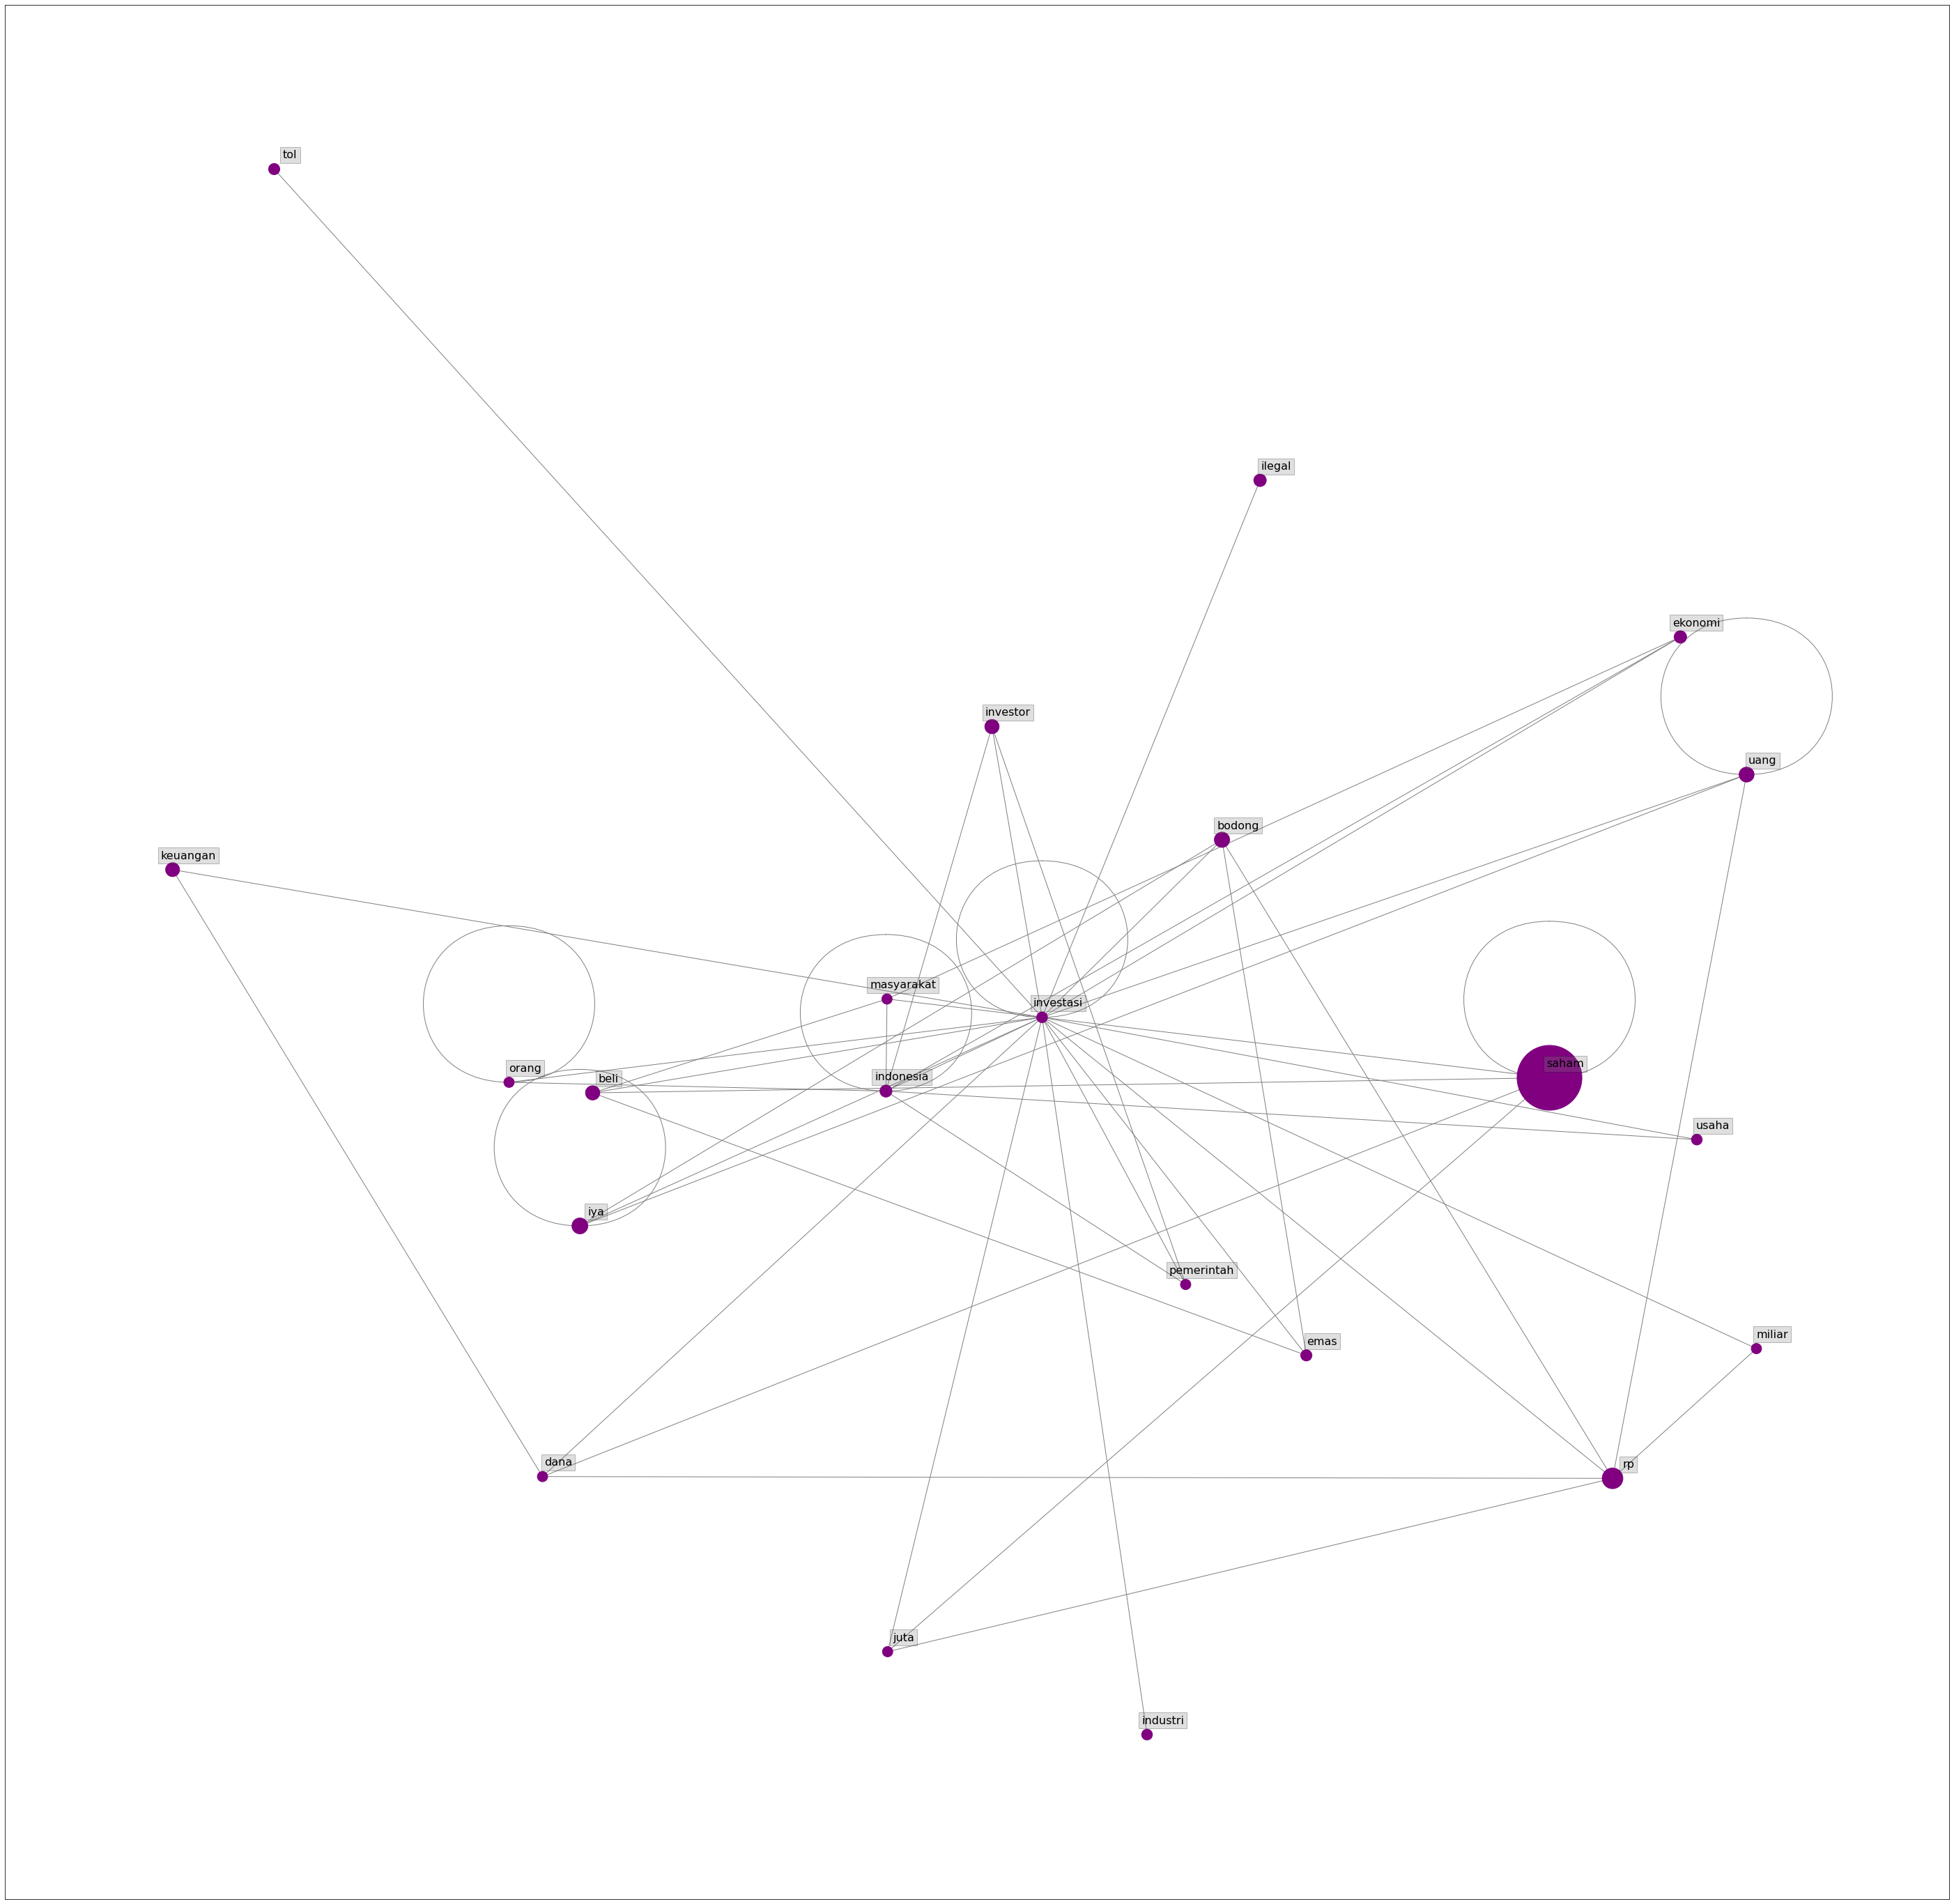

In [252]:
fig, ax = plt.subplots(figsize=(50, 50))

pos = nx.spring_layout(G, k=1.5)
k = G.subgraph(node)
print(k)

nx.draw_networkx(
    k,
    pos=pos,
    font_size=14,
    font_color='white',
    width=1,
    edge_color='grey',
    node_color='purple',
    node_size= degree,
    with_labels=False,
    ax=ax
)

# # Create offset labels
for key, value in pos.items():
  if key in node:
    x, y = value[0]+.005, value[1]+.005
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=16)

plt.show()


# Kesimpulan

dari hasil diatas terdapat beberapa topik yang perlu diketahui yaitu investasi bodong dan investasi digital.

Hal ini terkait dengan isu belakangan yang sering menyalahgunakan investasi untuk melakukan tindakan penipuan. Tentu ini menjadi perhatian semua pihak.